**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
!wget https://www.python.org/ftp/python/3.11.0/Python-3.11.0.tgz
!tar -xvf Python-3.11.0.tgz
%cd Python-3.11.0
!./configure --enable-optimizations
!make -j 4
!sudo make altinstall
!python3.11 --version


串流輸出內容已截斷至最後 5000 行。
Compiling '/usr/local/lib/python3.11/test/pydocfodder.py'...
Compiling '/usr/local/lib/python3.11/test/pythoninfo.py'...
Compiling '/usr/local/lib/python3.11/test/re_tests.py'...
Compiling '/usr/local/lib/python3.11/test/regrtest.py'...
Compiling '/usr/local/lib/python3.11/test/relimport.py'...
Compiling '/usr/local/lib/python3.11/test/reperf.py'...
Compiling '/usr/local/lib/python3.11/test/sample_doctest.py'...
Compiling '/usr/local/lib/python3.11/test/sample_doctest_no_docstrings.py'...
Compiling '/usr/local/lib/python3.11/test/sample_doctest_no_doctests.py'...
Compiling '/usr/local/lib/python3.11/test/seq_tests.py'...
Compiling '/usr/local/lib/python3.11/test/setup_testcppext.py'...
Compiling '/usr/local/lib/python3.11/test/signalinterproctester.py'...
Compiling '/usr/local/lib/python3.11/test/sortperf.py'...
Compiling '/usr/local/lib/python3.11/test/ssl_servers.py'...
Compiling '/usr/local/lib/python3.11/test/ssltests.py'...
Compiling '/usr/local/lib/python3.11

In [ ]:
!pip3 install uv
!uv --version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 39.1 MB/s eta 0:00:00
uv 0.9.7


In [ ]:
!uv sync

error: No `pyproject.toml` found in current directory or any parent directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/DM2025-Lab2-Exercise'
import os

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv(os.path.join(data_path, "data/semeval/train/anger-ratings-0to1.train.txt"),
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(os.path.join(data_path, "data/semeval/train/sadness-ratings-0to1.train.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(os.path.join(data_path, "data/semeval/train/fear-ratings-0to1.train.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(os.path.join(data_path, "data/semeval/train/joy-ratings-0to1.train.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv(os.path.join(data_path, "data/semeval/dev/anger-ratings-0to1.dev.gold.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(os.path.join(data_path, "data/semeval/dev/sadness-ratings-0to1.dev.gold.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(os.path.join(data_path, "data/semeval/dev/fear-ratings-0to1.dev.gold.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(os.path.join(data_path, "data/semeval/dev/joy-ratings-0to1.dev.gold.txt"),
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


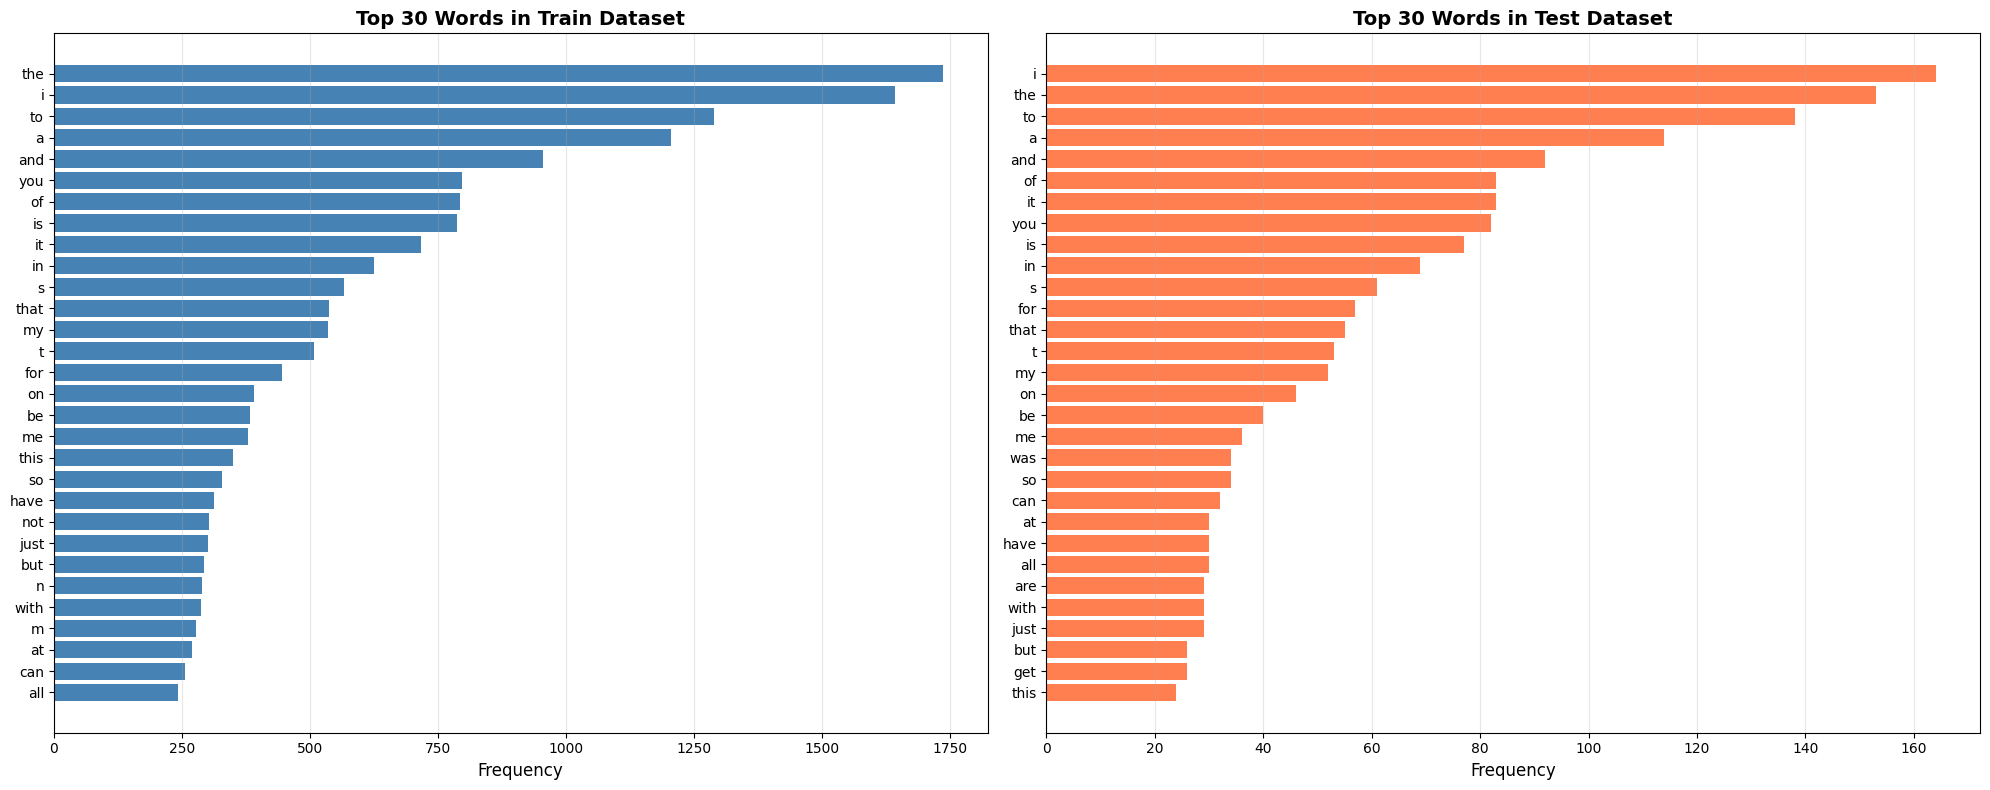

In [ ]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

def get_word_frequencies(df, text_column='text', top_n=30):
    """
    Extract word frequencies from a text column in a dataframe.

    Parameters:
    - df: DataFrame containing the text data
    - text_column: Name of the column containing text
    - top_n: Number of top words to return

    Returns:
    - Counter object with top N word frequencies
    """
    # Combine all text into one string
    all_text = ' '.join(df[text_column].astype(str).values)

    # Convert to lowercase and extract words (alphanumeric only)
    words = re.findall(r'\b[a-z]+\b', all_text.lower())

    # Count word frequencies
    word_freq = Counter(words)

    # Get top N words
    top_words = dict(word_freq.most_common(top_n))

    return top_words

def plot_word_frequencies(train_df, test_df, top_n=30):
    """
    Plot word frequencies for train and test datasets.

    Parameters:
    - train_df: Training dataframe
    - test_df: Test dataframe
    - top_n: Number of top words to plot
    """
    # Get word frequencies
    train_freq = get_word_frequencies(train_df, top_n=top_n)
    test_freq = get_word_frequencies(test_df, top_n=top_n)

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot Train data
    words_train = list(train_freq.keys())
    counts_train = list(train_freq.values())
    axes[0].barh(range(len(words_train)), counts_train, color='steelblue')
    axes[0].set_yticks(range(len(words_train)))
    axes[0].set_yticklabels(words_train)
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Frequency', fontsize=12)
    axes[0].set_title(f'Top {top_n} Words in Train Dataset', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)

    # Plot Test data
    words_test = list(test_freq.keys())
    counts_test = list(test_freq.values())
    axes[1].barh(range(len(words_test)), counts_test, color='coral')
    axes[1].set_yticks(range(len(words_test)))
    axes[1].set_yticklabels(words_test)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Frequency', fontsize=12)
    axes[1].set_title(f'Top {top_n} Words in Test Dataset', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return train_freq, test_freq

train_freq, test_freq = plot_word_frequencies(train_df, test_df, top_n=30)

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
# save to pickle file
train_df.to_pickle(os.path.join(data_path, "./data/train_df.pkl"))
test_df.to_pickle(os.path.join(data_path, "./data/test_df.pkl"))

In [ ]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle(os.path.join(data_path, "./data/train_df.pkl"))
test_df = pd.read_pickle(os.path.join(data_path, "./data/test_df.pkl"))

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


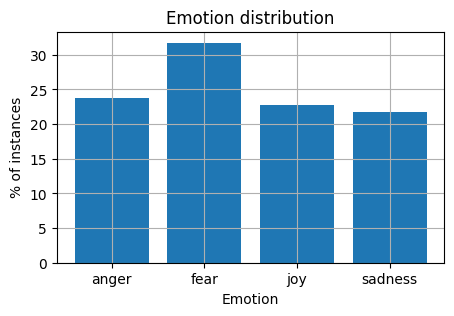

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

Let's try using another tokenizer below.

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 7, 0, ..., 0, 0, 0],
       [0, 5, 1, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Build TF-IDF vectorizer with 1000 features
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# 1. Learn vocabulary and IDF from training data
TFIDF_1000.fit(train_df['text'])

# 2. Transform documents to TF-IDF matrix
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

# Get feature names
feature_names_TFIDF_1000 = TFIDF_1000.get_feature_names_out()
feature_names_TFIDF_1000[100:110]

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'anger', 'fear', 'fear', 'joy', 'anger', 'joy',
       'anger', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.69      0.70      0.69        84
        fear       0.69      0.69      0.69       110
         joy       0.71      0.72      0.72        79
     sadness       0.63      0.61      0.62        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[59 15  6  4]
 [11 76  8 15]
 [ 8  7 57  7]
 [ 8 12  9 45]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

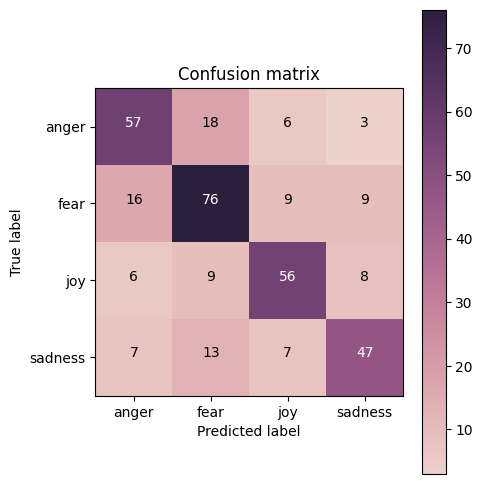

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
# 1. The model performs well overall, particularly in identifying fear.
# 2. The model struggles to distinguish between anger and fear.

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.64      0.64        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.70      0.70      0.70       347



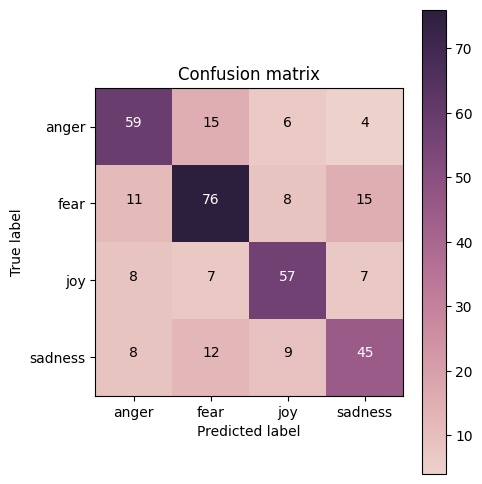

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# build Naive Bayes model
NB_model = MultinomialNB()

# training!
NB_model = NB_model.fit(X_train, y_train)

# predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

# Funciton for visualizing confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
# 1. Both models perform similarly overall, with Naive Bayes slightly better on anger but slightly worse on sadness.
# 2. The Fear class remains the easiest for both models.
# 3. Both models confuse between anger and fear, but Naive Bayes model shows slightly less confusion.
# 4. Naive Bayes assumes feature independence and builds linear decision boundaries, making it more robust and generalizable in high-dimensional text data.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4101 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1466     fear
867      fear
590     anger
350     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [ ]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(os.path.join(data_path, 'logs/training_log.csv'))

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 52s 437ms/step - accuracy: 0.3677 - loss: 1.3378 - val_accuracy: 0.4726 - val_loss: 1.2600
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.6385 - loss: 1.0605 - val_accuracy: 0.6830 - val_loss: 0.8931
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.8135 - loss: 0.5810 - val_accuracy: 0.7089 - val_loss: 0.7742
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8662 - loss: 0.3784 - val_accuracy: 0.7061 - val_loss: 0.7771
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9058 - loss: 0.2881 - val_accuracy: 0.6974 - val_loss: 0.7929
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9202 - loss: 0.2457 - val_accuracy: 0.6974 - val_loss: 0.8315
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9411 - loss: 0.2070 - val_accuracy: 0.7233 - val_loss: 0.8804
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9448 - loss: 0.1743 - val

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step


array([[9.9992955e-01, 8.5050506e-06, 1.8903431e-05, 4.3045577e-05],
       [9.9989080e-01, 3.2829565e-05, 2.0798611e-06, 7.4314492e-05],
       [8.4151411e-03, 4.5226015e-02, 9.2312270e-01, 2.3236113e-02],
       [4.0586983e-04, 4.7721463e-01, 5.2058315e-01, 1.7964056e-03],
       [3.4190182e-06, 9.9998534e-01, 8.3511532e-06, 2.8255024e-06]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'joy', 'joy', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(os.path.join(data_path, "logs/training_log.csv"))
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.395239,1.313638,0.472622,1.260005
1,1,0.672018,0.956495,0.682997,0.893125
2,2,0.806255,0.559610,0.708934,0.774216
3,3,0.858843,0.392665,0.706052,0.777062
4,4,0.889842,0.312048,0.697406,0.792878
5,5,0.913645,0.256321,0.697406,0.831519
6,6,0.936895,0.207580,0.723343,0.880375
7,7,0.944368,0.180381,0.703170,0.956372
8,8,0.953224,0.155939,0.711816,0.979765
9,9,0.963465,0.132252,0.697406,1.040186


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


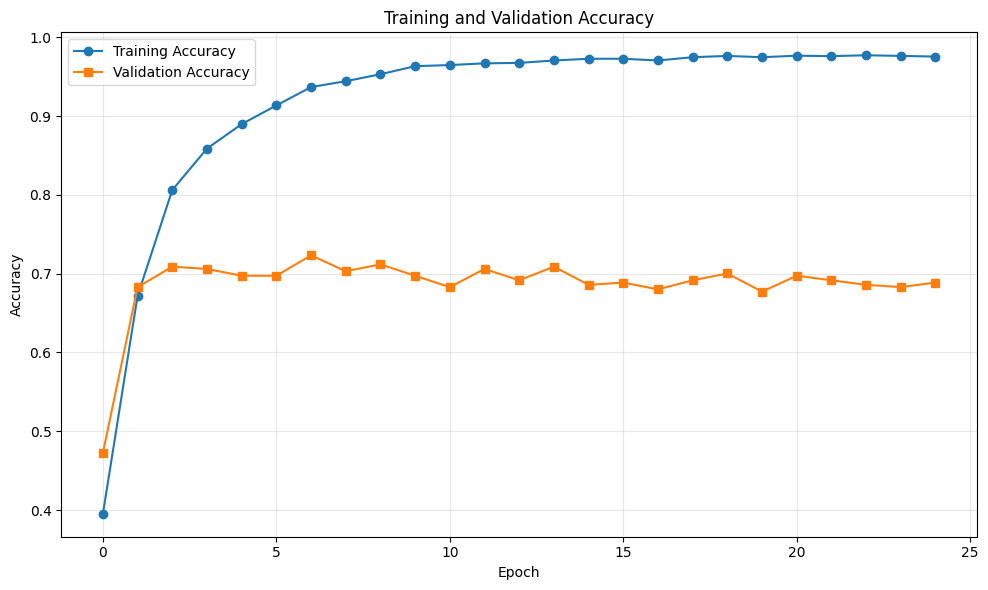

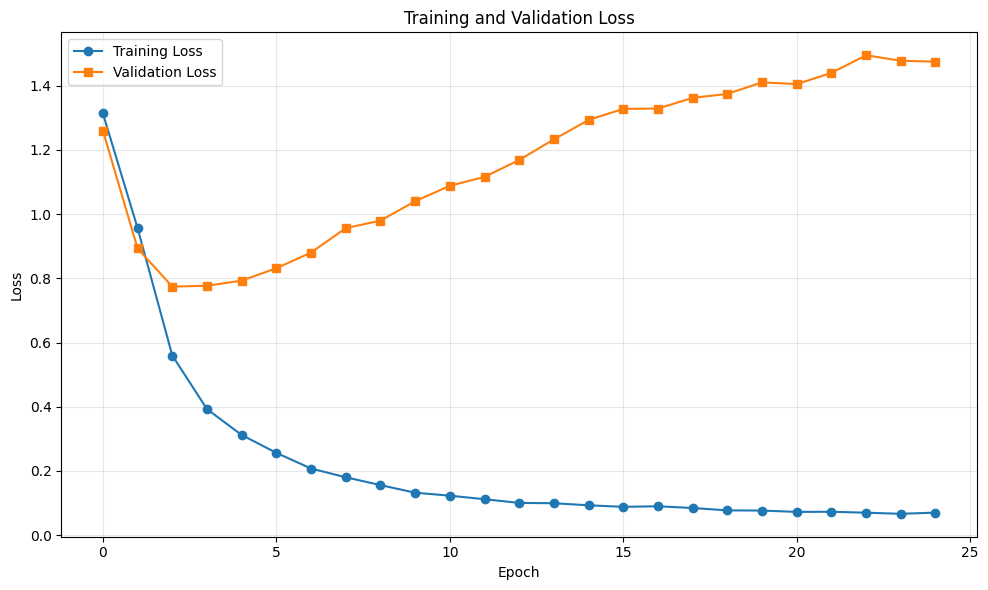

In [ ]:
# Answer here
import matplotlib.pyplot as plt
# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', marker='o')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss', marker='o')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Insight
# 1. The training accuracy increased dramastically after the first epoch, so did the validation accuracy.
# 2. The training accuracy kept increasing until it's nearly 1; while the validation accuracy didn't. The validation accuracy stops at around 0.7.
# 3. The training loss kept decreasing, while the validation loss decreased at first, but increased after the third epoch.
# 4. In conclusion, since the validation loss id getting higher, and the validation accuracy is much lower than the training accuracy, which means it shows the overfitting problem.

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 40.6 MB/s eta 0:00:00


In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
839,10839,Grateful for all the hungry people in my life!...,"[Grateful, for, all, the, hungry, people, in, ..."
43,10043,so ef whichever butt wipe pulled the fire alar...,"[so, ef, whichever, butt, wipe, pulled, the, f..."
247,10247,i will never watch greys anatomy ever ever eve...,"[i, will, never, watch, greys, anatomy, ever, ..."
2886,40059,Am I the only person who dislikes fall? #First...,"[Am, I, the, only, person, who, dislikes, fall..."
2417,30413,"To insure good health: Eat lightly, breathe de...","[To, insure, good, health, :, Eat, lightly, ,,..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Grateful', 'for', 'all', 'the', 'hungry', 'people', 'in', 'my', 'life', '!', 'Hungry', 'to', 'learn', ',', 'change', ',', 'grow', ',', 'help', ',', 'etc', '-', 'not', 'sure', 'anybody', 'has', 'it', 'better', '!', '#', 'relentless']),
       list(['so', 'ef', 'whichever', 'butt', 'wipe', 'pulled', 'the', 'fire', 'alarm', 'in', 'davis', 'bc', 'I', 'was', 'sound', 'asleep', '#', 'pissed', '#', 'upset', '#', 'tired', '#', 'sad', '#', 'tired', '#', 'hangry', '#', '#', '#', '#', '#', '#']),
       list(['i', 'will', 'never', 'watch', 'greys', 'anatomy', 'ever', 'ever', 'ever', 'ever', 'ever', 'again', 'if', 'Shonda', 'Rimes', 'takes', 'away', 'another', 'OG', 'character☹️☹️☹️☹️☹️☹️☹️☹️☹️☹️', '#', 'fuming'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.27472875,  0.65217924,  0.21316366, -0.12563823, -0.42301947,
       -1.3481905 ,  0.8172165 ,  1.1293104 , -0.16034997, -0.66353625,
       -0.08168031, -0.48482028, -0.42573225,  0.52432233, -0.29182172,
       -0.54660827,  0.7017508 , -0.28717345,  0.19224937, -0.83011043,
        0.64775985,  0.63591456,  0.27336374,  0.30957264,  0.21375702,
        0.2608537 , -1.1896349 ,  0.70212996, -0.20776305,  0.26248413,
        0.44706798, -0.061269  ,  0.34666434, -0.5411927 , -0.05442933,
        0.10054024,  0.5655855 , -0.07532018, -0.48482466, -0.21536285,
        0.02736772, -0.06136877, -0.07396559, -0.12629372,  0.3877312 ,
        0.09973147, -0.96965104,  0.46606547,  0.26732785,  0.5900829 ,
        0.31508377, -0.5424847 ,  0.03151599, -0.20055938, -0.5833605 ,
       -0.39532274,  0.37614962, -0.155364  ,  0.11376265,  0.43170193,
        0.25908688, -0.4081276 ,  0.58544564,  0.6388586 , -0.6514673 ,
        0.7681072 ,  0.34090066,  0.99084365, -1.1652931 ,  0.57

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.938210666179657),
 ('bday', 0.9348095655441284),
 ('help', 0.9296362996101379),
 ('Be', 0.9185599684715271),
 ('future', 0.904963493347168),
 ('blessed', 0.9025821685791016),
 ('right', 0.8993457555770874),
 ('infuriate', 0.8953375816345215),
 ("'you", 0.8921036720275879),
 ('cry', 0.8911226391792297)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("didiersalazar/google-news-vectors")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'google-news-vectors' dataset.
Path to dataset files: /kaggle/input/google-news-vectors


In [ ]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "/kaggle/input/google-news-vectors/GoogleNews-vectors-negative300.bin" #
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
# 1. Use the average of all word vectors in a sentence to represent the sentence.
# 2. Use TF-IDF-weighted averaging of word vectors to give more importance to informative words.
# 3. Represent each sentence as a matrix (sequence of word embeddings) and feed it into a sequential model such as an RNN, LSTM, or Transformer.

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

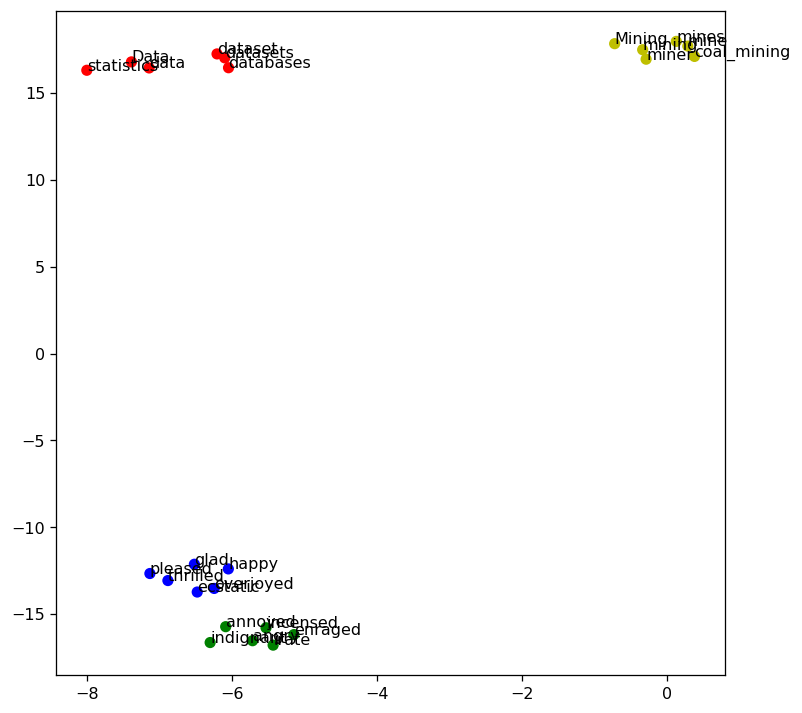

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

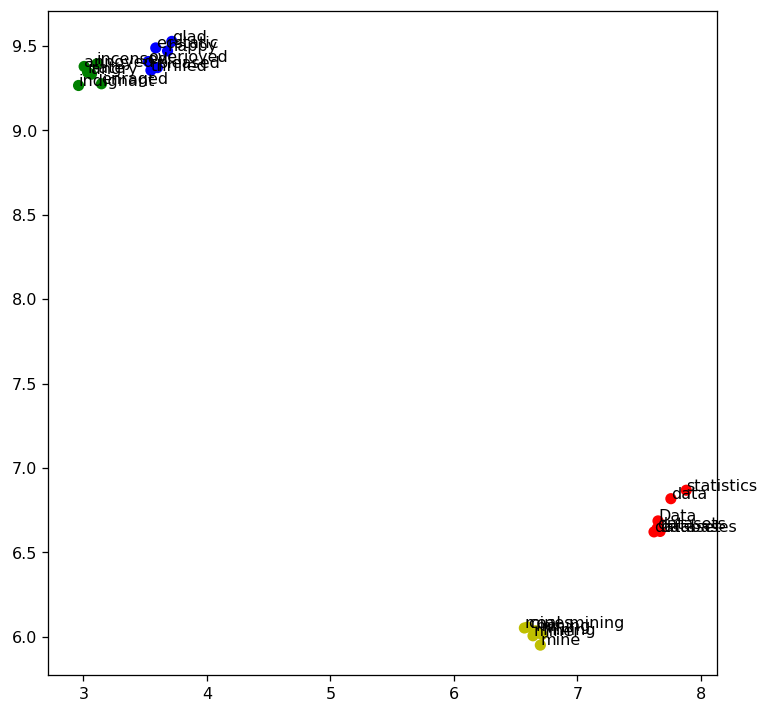

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Total words: 64
Running t-SNE...
Running UMAP...


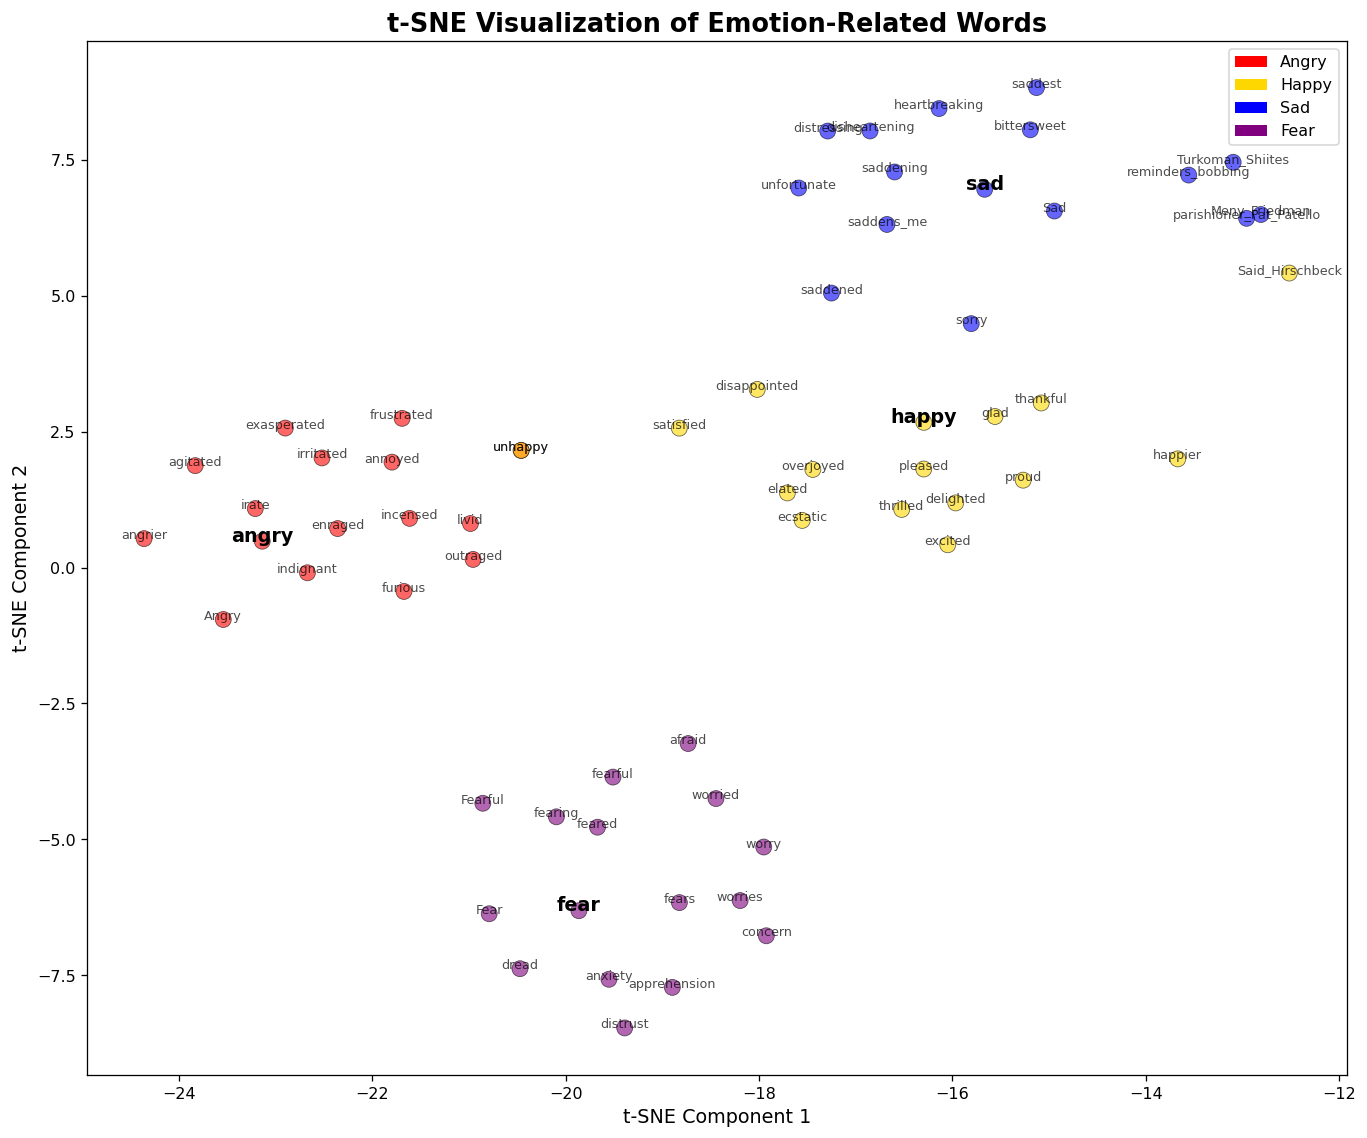

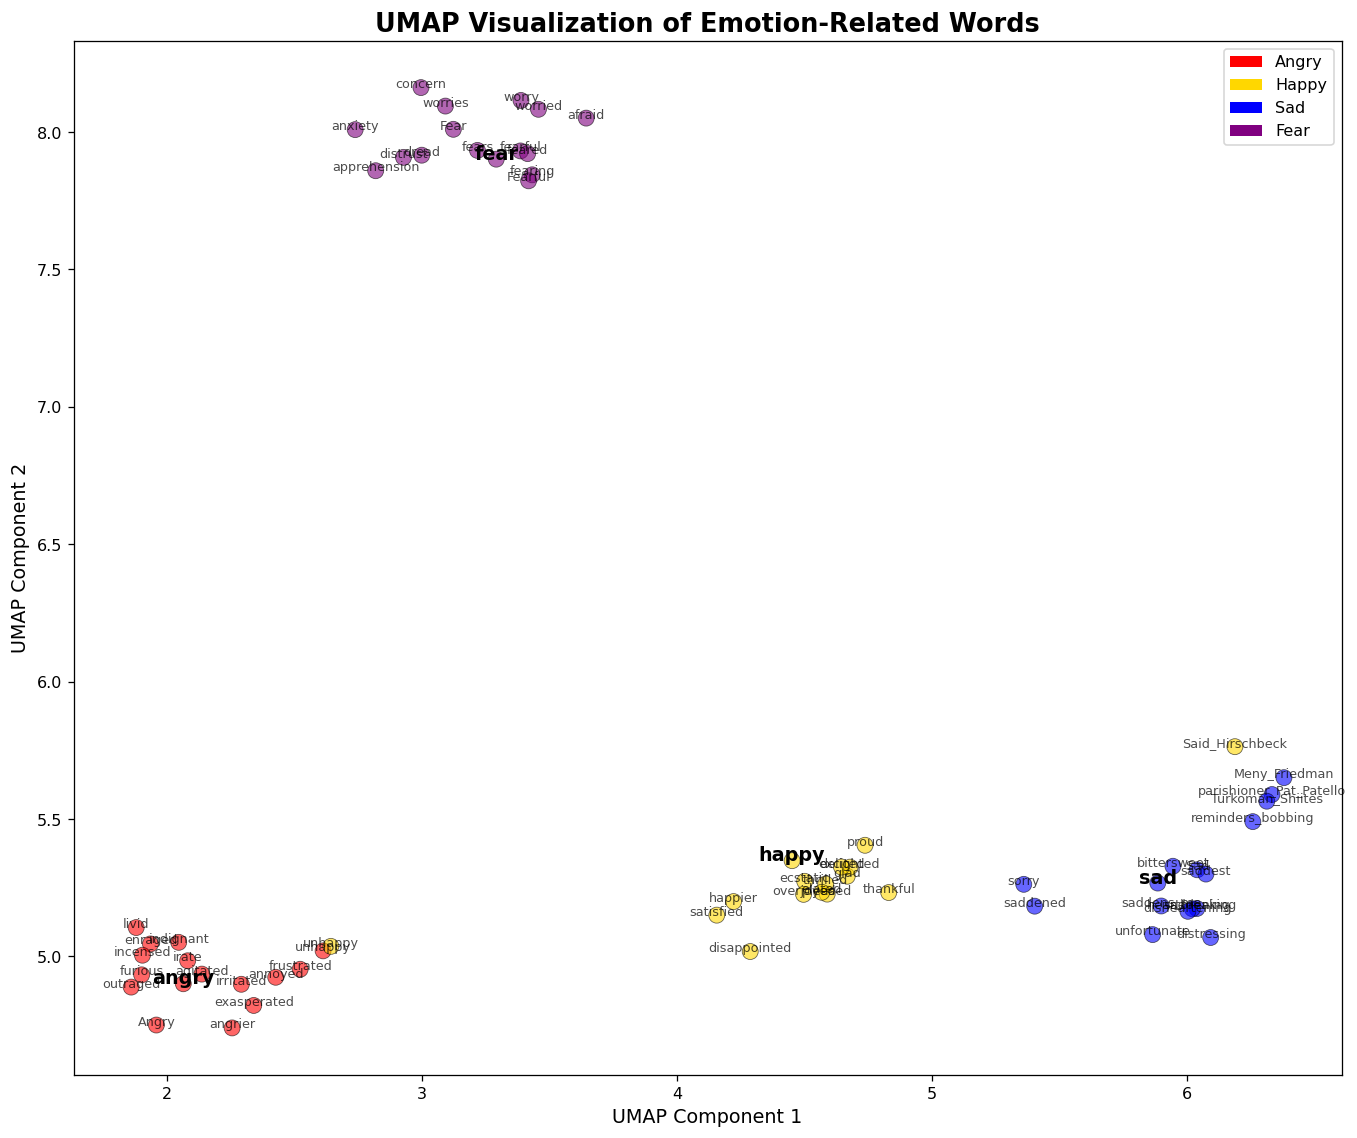

In [ ]:
# Answer here
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.manifold import TSNE
import numpy as np

## w2v model
model = w2v_google_model

## Define the 4 emotion words
emotion_words = ["angry", "happy", "sad", "fear"]

## Find 15 most similar words for each emotion (60 words total)
target_words = []
emotion_labels = []

for emotion in emotion_words:
    # Get the emotion word itself
    target_words.append(emotion)
    emotion_labels.append(emotion)

    # Get 15 most similar words
    similar_words = model.most_similar(emotion, topn=15)
    for word, similarity in similar_words:
        target_words.append(word)
        emotion_labels.append(emotion)

print(f"Total words: {len(target_words)}")

## Prepare training word vectors
size = 200
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## Define colors for each emotion
color_map = {
    "angry": "red",
    "happy": "gold",
    "sad": "blue",
    "fear": "purple"
}
colors = [color_map[label] for label in emotion_labels]

## t-SNE model
print("Running t-SNE...")
tsne_model = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=30)
X_tsne = tsne_model.fit_transform(X_train)

## UMAP model
print("Running UMAP...")
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

## Plot t-SNE result
plt.figure(figsize=(12, 10), dpi=115)
target_size = len(target_words)

plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=colors, s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Annotate only the main emotion words in larger font
for i, (label, x, y) in enumerate(zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1])):
    if label in emotion_words:
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                    fontsize=12, fontweight='bold', ha='center')
    else:
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                    fontsize=8, ha='center', alpha=0.7)

plt.title('t-SNE Visualization of Emotion-Related Words', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[emotion], label=emotion.capitalize())
                   for emotion in emotion_words]
plt.legend(handles=legend_elements, loc='best', fontsize=10)
plt.tight_layout()
plt.show()

## Plot UMAP result
plt.figure(figsize=(12, 10), dpi=115)

plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=colors, s=100, alpha=0.6, edgecolors='black', linewidth=0.5)

# Annotate only the main emotion words in larger font
for i, (label, x, y) in enumerate(zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1])):
    if label in emotion_words:
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                    fontsize=12, fontweight='bold', ha='center')
    else:
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                    fontsize=8, ha='center', alpha=0.7)

plt.title('UMAP Visualization of Emotion-Related Words', fontsize=16, fontweight='bold')
plt.xlabel('UMAP Component 1', fontsize=12)
plt.ylabel('UMAP Component 2', fontsize=12)

# Create legend
legend_elements = [Patch(facecolor=color_map[emotion], label=emotion.capitalize())
                   for emotion in emotion_words]
plt.legend(handles=legend_elements, loc='best', fontsize=10)
plt.tight_layout()
plt.show()

# Insight
# t-SNE focuses on local structure, resulting in more dispersed points within clusters, and the distances between clusters have no meaningful interpretation.
# UMAP preserves both local and global structure, producing denser clusters with clearer separation, and the distances between clusters are more meaningful.

---